## Data from a Turkish Software Industry (Donated by Software Research Laboratory- Softlab- Bogazici University, Istanbul, Turkey

#### Software effort data collected in the form of COCOMO II. Consists of data from 12 projects and 5 different software companies in various domains.

https://zenodo.org/record/268433#.WvyY-dMvw1I

In [7]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Formatação mais bonita para os notebooks
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

In [8]:
df_sdr = pd.read_csv('../Datasets/03.sdr.csv')

# You can only do that if the variable is ordinal, i.e. if there is a clear ordering 
# (and yes, then it is probably a good idea). But if it is nominal, i.e. "only a name", 
# you have to use dummy variables, i.e. a set of variables for each possibility using 
# one-hot-encoding to designate the value.

pcap_mapping = {'Very Low':0, 'Low':1, 'Nominal':2, 'High':3, 'Very High':4, 'Extra High':5}
ruse_mapping = {'Very Low':0, 'Low':1, 'Nominal':2, 'High':3, 'Very High':4, 'Extra High':5}
team_mapping = {'Very Low':0, 'Low':1, 'Nominal':2, 'High':3, 'Very High':4, 'Extra High':5}
site_mapping = {'Very Low':0, 'Low':1, 'Nominal':2, 'High':3, 'Very High':4, 'Extra High':5}
prec_mapping = {'Very Low':0, 'Low':1, 'Nominal':2, 'High':3, 'Very High':4, 'Extra High':5}
loc_mapping = {'Very Low':0, 'Low':1, 'Nominal':2, 'High':3, 'Very High':4, 'Extra High':5}


df_sdr['PCAP'] = df_sdr['PCAP'].map(pcap_mapping)
df_sdr['RUSE'] = df_sdr['RUSE'].map(ruse_mapping)
df_sdr['TEAM'] = df_sdr['TEAM'].map(team_mapping)
df_sdr['SITE'] = df_sdr['SITE'].map(site_mapping)
df_sdr['PREC'] = df_sdr['PREC'].map(prec_mapping)

# df_srd.info()
# df_srd.isnull().values.any()
df_srd.head()

,id,ProjectID,PREC,FLEX,RESL,TEAM,PMAT,RELY,DATA,CPLX,...,PCAP,PCON,AEXP,PEXP,LTEX,TOOL,SITE,SCED,LOC,ACTUAL
0,1,1,4,Nominal,Low,3,Very Low,Nominal,Nominal,Low,...,4,Very High,Very High,High,High,High,1,Nominal,3000,1.2
1,2,2,4,Nominal,Low,4,Very Low,High,Nominal,Low,...,3,Very High,Very High,Very High,Very High,High,0,High,2000,2.0
2,3,3,5,Nominal,Low,3,Very Low,High,Very High,Low,...,3,Very High,Very High,Very High,Very High,High,0,High,4250,4.5
3,4,4,5,High,High,3,Nominal,High,High,Very High,...,3,Very Low,High,Very High,High,Nominal,3,High,10000,3.0
4,5,5,2,Nominal,Low,3,Nominal,Low,Nominal,Very High,...,3,High,Nominal,Nominal,Nominal,Nominal,3,Low,15000,4.0


In [9]:
def print_r2(dependents_var_list, independent_var):
    model = LinearRegression()
    for x in dependents_var_list:
        model.fit(np.reshape(np.array(df_srd[x]), (len(df_srd[x]), 1)), independent_var) 
        print("R-Squared coefficient of '{}' : {}".format(x,model.score(np.reshape(np.array(df_sdr[x]), (len(df_sdr[x]), 1)),independent_var)))


effort = np.reshape(np.array(df_sdr['ACTUAL']), (len(df_sdr['ACTUAL']), 1)) 
print_r2(['PCAP','RUSE','TEAM','SITE','PREC','LOC'], effort)

R-Squared coefficient of 'PCAP' : 0.028615101623119976
R-Squared coefficient of 'RUSE' : 0.009404510537974087
R-Squared coefficient of 'TEAM' : 4.626382595906975e-07
R-Squared coefficient of 'SITE' : 0.16363119304250584
R-Squared coefficient of 'PREC' : 0.06734085689055347
R-Squared coefficient of 'LOC' : 0.6105513546493999


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


### Graphs

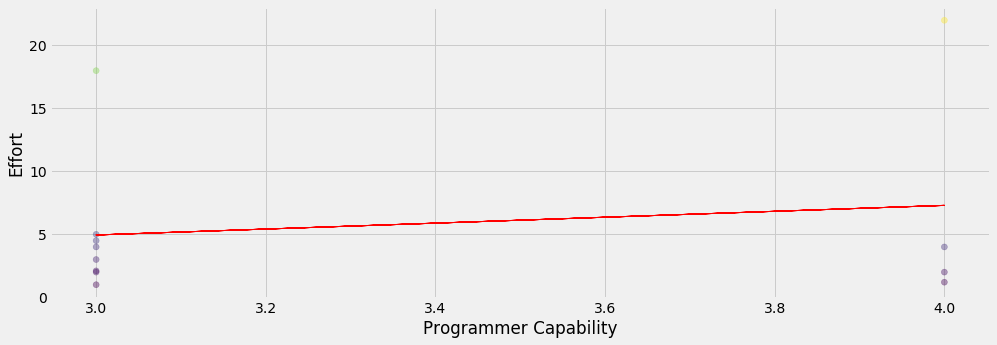

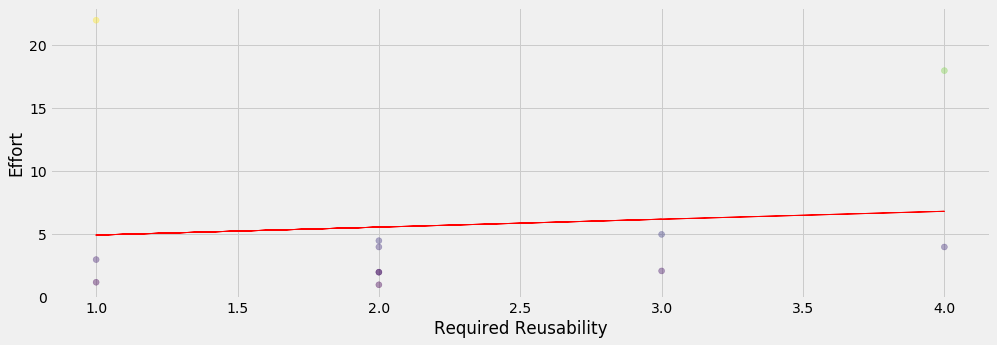

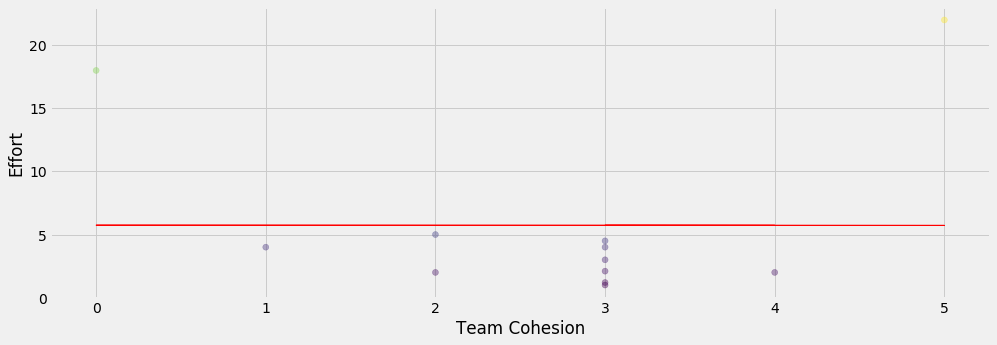

In [10]:
def show_corr(columnName, xlabel, ylabel):
    model = LinearRegression()
    column = df_srd[columnName].values.reshape(-1,1)
    model.fit(column, df_srd['ACTUAL'])
    predictions =  model.predict(column)
    plt.plot(column, predictions, color='red', linewidth=1)
    plt.scatter(column, df_srd['ACTUAL'], alpha=0.4, c=df_srd['ACTUAL'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
show_corr('PCAP',"Programmer Capability",'Effort')
show_corr('RUSE',"Required Reusability",'Effort')
show_corr('TEAM',"Team Cohesion",'Effort')



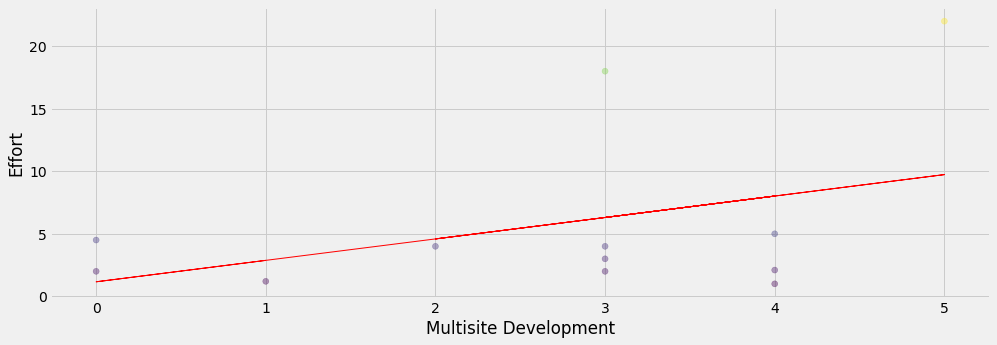

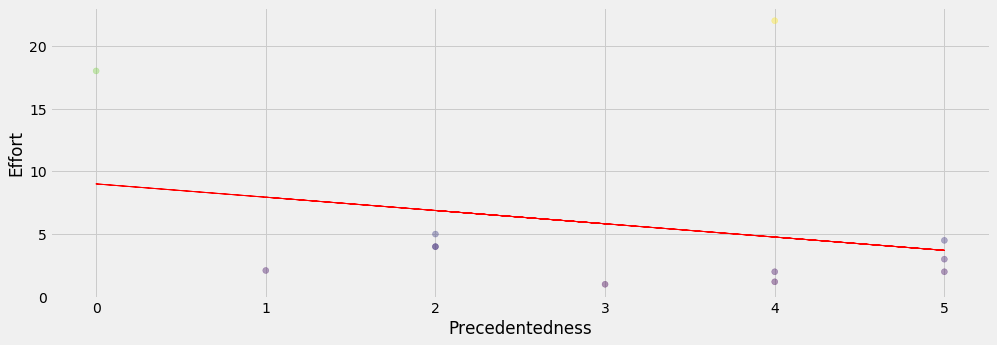

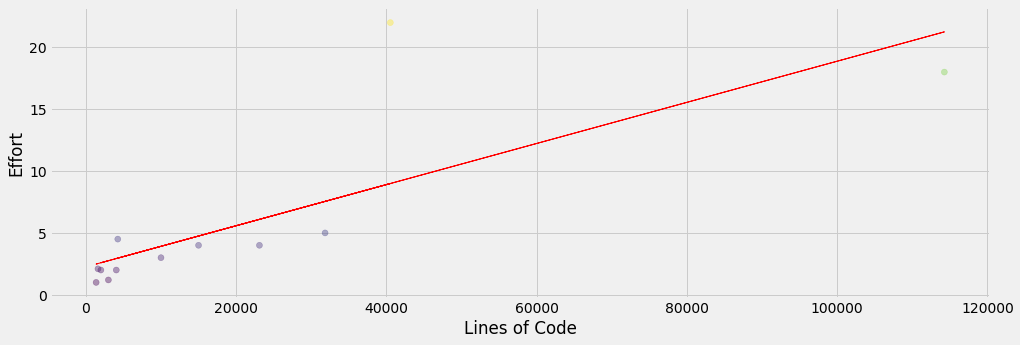

In [11]:
show_corr('SITE',"Multisite Development",'Effort')
show_corr('PREC',"Precedentedness",'Effort')
show_corr('LOC',"Lines of Code",'Effort')